In [1]:
import numpy as np
from scipy import special
import matplotlib.pyplot as plt

In [2]:
#Parameters
omega0 = 1                       #angular frequency

x0 = 1                           #initial position
v0 = 0                           #initial velocity
beta = 0.5
n = 2

tmax = 100                       #max integration time
dt = 0.01                        #time step
Nt = int(np.floor(tmax/dt)+1)    #number of time steps (fixed by tmax, dt)

t = np.linspace(0,tmax,Nt)       #array of time values
x = np.zeros(Nt)                 #array to store x values
v = np.zeros(Nt)                 #array to store v values

x[0] = x0
v[0] = v0

In [3]:
#time evolution
i=0
fv = beta*np.abs(v[i])**(n-1)*v[i]
for i in range(0,Nt-1):
    v[i+1] = v[i] + dt*(-(omega0**2)*x[i]) - fv #Simple forward-Euler integration
    x[i+1] = x[i] + dt*v[i+1]                   #BUT using v[i+1] here actually improves the 
                                                #accuracy more than you'd expect if you ever
                                                #coded RK4 from scratch (that's still better)

In [4]:
#analytic solution (undamped)
xa = x0*np.cos(omega0*t)

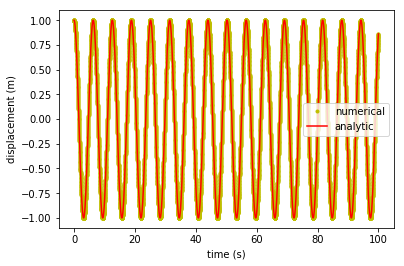

In [5]:
plt.plot(t,x, 'y.')
plt.plot(t,xa, 'r-')
plt.legend(['numerical','analytic'])
plt.xlabel('time (s)')
plt.ylabel('displacement (m)')
plt.show()

## Numerical Error

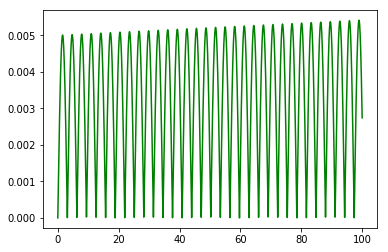

In [6]:
e = np.abs(x - xa)

plt.figure()
plt.plot(t,e,'g-')
plt.show()

## Sliding Friction (n=0)

In [7]:
def A0(x,t):
    if (-beta*t/(k*m) + x) > 0:
        return (-beta*t/(k*m) + x)
    else: 
        return 0.0

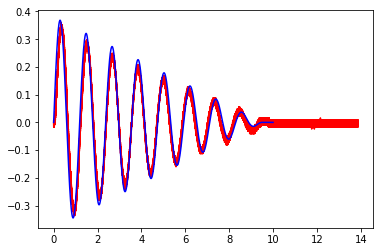

In [8]:
drag2 = np.genfromtxt('Drag2.csv', delimiter=',')

k = 5
m = 1
x = .38
w = 5.3
beta = 0.2

t = np.linspace(0,10,1000)

a0 = np.zeros(np.size(t))
for i in range(0,np.size(t)):
    a0[i] = A0(x,t[i])*np.sin(w*t[i])

drag2t = drag2[27153:, 0]
drag2v = drag2[27153:, 1]
drag2t = drag2t-drag2t[0]

plt.figure()
plt.plot(drag2t,drag2v, 'r-')
plt.plot(t,a0,'b-')
plt.show()

## (n=1)

In [9]:
def A1(x,t):
    return x*np.exp(-beta*w*t/(4*m*k))

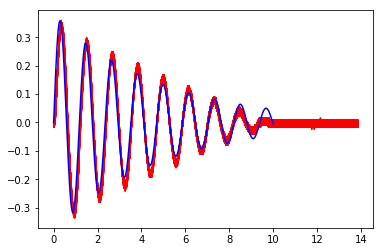

In [168]:
drag1 = np.genfromtxt('Drag1.csv', delimiter=',')

k = 1.6
m = 1
x = .38
w = 5.35
beta = 0.25

t = np.linspace(0,10,1000)

drag1t = drag1[:, 0]
drag1v = drag1[:, 1]

a1 = A1(x,t)*np.sin(w*t)

plt.figure()
plt.plot(drag2t,drag2v, 'r-')
plt.plot(t,a1,'b-')
plt.show()

## (n = 2)

In [82]:
def A2(x,t):
    return x/(1+(2*beta*t)/(m*w*k))

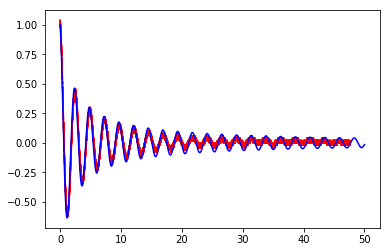

In [133]:
paddle = np.genfromtxt('PaddleData.csv', delimiter=',')

k = .1
m = 4
x = 1
w = 2.6

t = np.linspace(0,50,1000)

paddlet = paddle[4:,0]
paddlev = paddle[4:,1]

a2 = A2(x,t)*np.cos(w*t)

plt.figure()
plt.plot(paddlet,paddlev, 'r-')
plt.plot(t,a2,'b-')
plt.show()

## Theta, mass, and Voltage

In [2]:
theta = [2.9,2.8,2.72,2.62,2.5,2.34]
m = [50,100,150,200,250,350]
V = [0,0.154,0.308,0.47,0.64,0.912]

In [ ]:
plt.figure()
plt.plot(m,theta,'b.')
plt.show()

plt.figure()
